# Analysis

## Modules

### Imports

In [1]:
import importlib.metadata
import itertools
import os
import types

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

### Versions

The current module versions in use are as follows:

In [2]:
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        poorly_named_packages = {"PIL": "pillow", "sklearn": "scikit-learn"}
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name


imports = list(set(get_imports()))

requirements = []
for dist in importlib.metadata.distributions():
    if (
        dist.metadata["Name"].lower() in imports
        and dist.metadata["Name"].lower() != "pip"
    ):
        requirements.append((dist.metadata["Name"], dist.version))

pd.DataFrame(requirements, columns=["Module", "Version"])

,Module,Version
0,matplotlib,3.9.2
1,numpy,1.26.4
2,pandas,2.2.3
3,scikit-learn,1.5.2


## Global variables

In [3]:
RESULTS_PATH = "./"
RAVDESS_TEST_LABELS_PATH = "../../nvark-kernel/datasets/KM/RAVDESS/RAVDESS_TEST.tsv"
RAVDESS_EMOTIONS = [
    "neutral",
    "calm",
    "happy",
    "sad",
    "angry",
    "fearful",
    "disgust",
    "surprised",
]
EMODB_TEST_LABELS_PATH = "../../nvark-kernel/datasets/KM/EmoDB/EmoDB_TEST.tsv"
EMODB_EMOTIONS = [
    "Anger",
    "Boredom",
    "Disgust",
    "Anxiety/Fear",
    "Happiness",
    "Sadness",
    "Neutral",
]
HAR_TEST_LABELS_PATH = "../../nvark-kernel/datasets/HAR/HAR_TEST.ts"
HAR_ACTIVITY = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING",
]

## Analysis functions

In [4]:
def plot_confusion_matrix(labels, predictions, class_names):
    print(f"Accuracy: {metrics.accuracy_score(labels, predictions) * 100:.3f}%")
    print(
        f"Precision: {metrics.precision_score(labels, predictions, average="macro") * 100:.3f}%"
    )
    print(
        f"Recall: {metrics.recall_score(labels, predictions, average="macro") * 100:.3f}%"
    )

    cm = metrics.confusion_matrix(y_true=labels, y_pred=predictions)

    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    # plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=30, ha="right")
    plt.yticks(tick_marks, class_names)

    labels = np.around(
        cm.astype("float") * 100 / cm.sum(axis=1)[:, np.newaxis],
        decimals=2,
    )

    threshold = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(
            j,
            i,
            # "\n" + str(int(cm[i, j])) + "\n" + str(labels[i, j]) + "%",
            "\n\n" + str(labels[i, j]) + "%",
            horizontalalignment="center",
            color=color,
        )

    plt.tight_layout()
    plt.ylabel("True class", fontsize=18)
    plt.xlabel("Predicted class", fontsize=18)

    plt.show()

## Main

### RAVDESS

#### Train

In [5]:
train_results = pd.DataFrame(
    np.load(os.path.join(RESULTS_PATH, "RAVDESS_trainmetrics.npy")),
    columns=["Accuracy", "Precision", "Recall", "F1"],
)

In [6]:
train_results.describe()

,Accuracy,Precision,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.398966,0.396893,0.398966,0.392788
std,0.003860,0.003254,0.003860,0.003383
min,0.392130,0.391765,0.392130,0.386861
25%,0.396798,0.394768,0.396798,0.391586
50%,0.398920,0.396953,0.398920,0.392477
75%,0.400579,0.398091,0.400579,0.393900
max,0.406790,0.403156,0.406790,0.399881


#### Test

In [7]:
labels = (
    pd.read_csv(
        RAVDESS_TEST_LABELS_PATH,
        header=None,
        sep="\t",
        usecols=[0],
    )
    .squeeze()
    .to_numpy()
) - 1

predictions = np.load(os.path.join(RESULTS_PATH, "RAVDESS_testlabels.npy"))

Accuracy: 41.752%
Precision: 41.540%
Recall: 39.482%


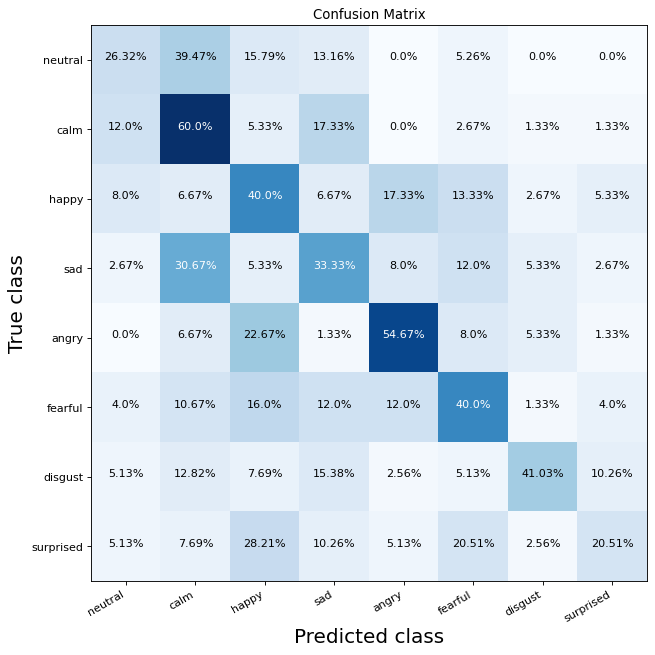

In [8]:
plot_confusion_matrix(labels, predictions, RAVDESS_EMOTIONS)

### EmoDB

#### Train

In [9]:
train_results = pd.DataFrame(
    np.load(os.path.join(RESULTS_PATH, "EmoDB_trainmetrics.npy")),
    columns=["Accuracy", "Precision", "Recall", "F1"],
)

In [10]:
train_results.describe()

,Accuracy,Precision,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.496901,0.482375,0.496901,0.479361
std,0.008321,0.006664,0.008321,0.007483
min,0.480282,0.465905,0.480282,0.461586
25%,0.493662,0.481345,0.493662,0.479441
50%,0.498239,0.482841,0.498239,0.481769
75%,0.501937,0.485353,0.501937,0.482414
max,0.508451,0.489757,0.508451,0.488820


#### Test

In [11]:
labels = (
    pd.read_csv(
        EMODB_TEST_LABELS_PATH,
        header=None,
        sep="\t",
        usecols=[0],
    )
    .squeeze()
    .to_numpy()
)

predictions = np.load(os.path.join(RESULTS_PATH, "EmoDB_testlabels.npy"))

Accuracy: 53.271%
Precision: 51.690%
Recall: 50.782%


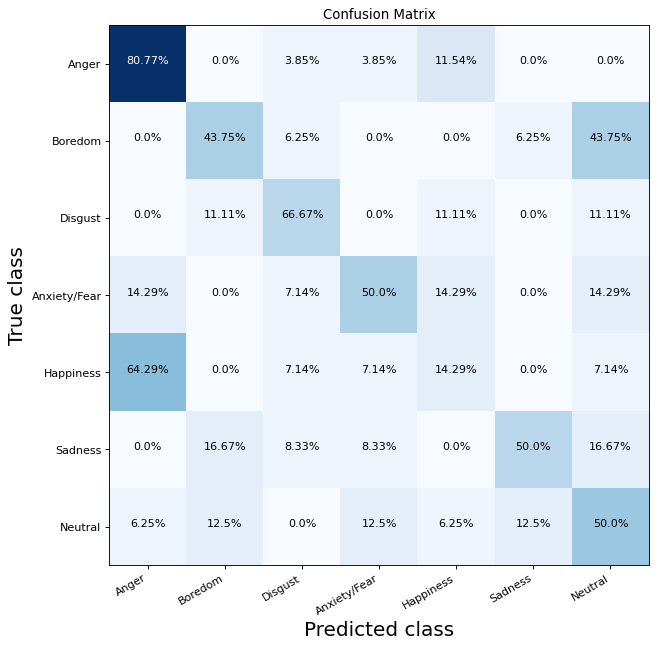

In [12]:
plot_confusion_matrix(labels, predictions, EMODB_EMOTIONS)

### HAR

#### Train

In [13]:
train_results = pd.DataFrame(
    np.load(os.path.join(RESULTS_PATH, "HAR_trainmetrics.npy")),
    columns=["Accuracy", "Precision", "Recall", "F1"],
)

In [14]:
train_results.describe()

,Accuracy,Precision,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.959720,0.959905,0.959720,0.959749
std,0.002461,0.002474,0.002461,0.002465
min,0.954594,0.954757,0.954594,0.954625
25%,0.958457,0.958727,0.958457,0.958500
50%,0.959703,0.959786,0.959703,0.959702
75%,0.961640,0.961862,0.961640,0.961684
max,0.962876,0.963142,0.962876,0.962925


#### Test

In [15]:
labels = [
    int(line.strip().split(":")[-1]) - 1
    for line in open(HAR_TEST_LABELS_PATH, "r")
    if line.strip() and not line.strip().startswith("@")
]

predictions = np.load(os.path.join(RESULTS_PATH, "HAR_testlabels.npy"))

Accuracy: 93.247%
Precision: 93.484%
Recall: 93.524%


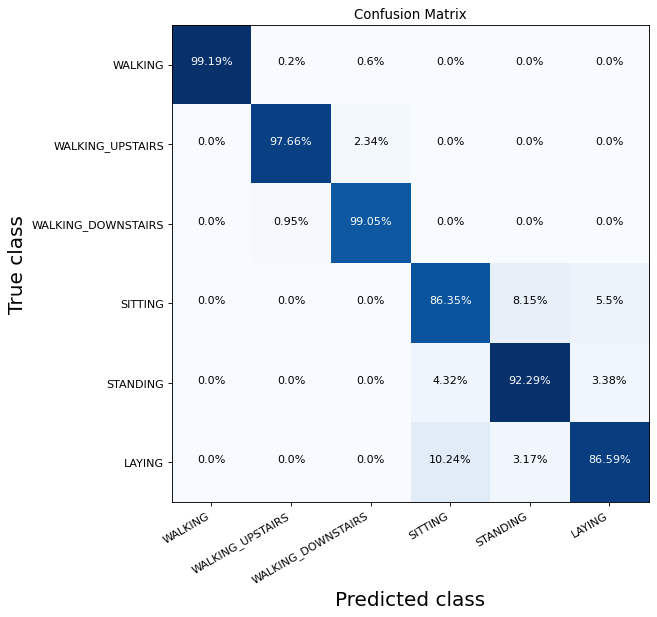

In [16]:
plot_confusion_matrix(labels, predictions, HAR_ACTIVITY)